In [2]:
import PAD
import Scraper
import Grapher

In [3]:
%matplotlib inline

In [4]:
dir(Grapher)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'calculate_flux_LM',
 'cbar_position',
 'cmap',
 'compute_fill_val',
 'create_flux_survey_spectrum',
 'create_raw_survey_PAD_plot',
 'create_raw_survey_PAD_plot_LM',
 'create_smooth_survey_PAD_plot',
 'dt',
 'find_sign_intervals',
 'make_brst_summary_plot',
 'make_fast_summary_plot',
 'mdates',
 'np',
 'patches',
 'plt',
 'visualize_FPI_pixels_in_LM']

In [5]:
m3_ebrst_debug = Scraper.construct_file_selector('mms3','brst','des-debug','3.1.1')
m3_efast_debug = Scraper.construct_file_selector('mms3','fast','des-debug','3.1.1')

encoding a search for mms3_fpi_brst_l2_des-debug_\d{14}_v3.1.1.cdf!
encoding a search for mms3_fpi_fast_l2_des-debug_\d{14}_v3.1.1.cdf!


In [6]:
m3_ebrst_debug_base_dir = 'x:/data/ftp/mms3/fpi/brst/l2/des-debug/2016/08'
m3_efast_debug_base_dir = 'x:/data/ftp/mms3/fpi/fast/l2/des-debug/2016/08'
m3_ebrst_debug_list     = Scraper.scrape_files(m3_ebrst_debug,m3_ebrst_debug_base_dir)
m3_efast_debug_list     = Scraper.scrape_files(m3_efast_debug,m3_efast_debug_base_dir)

In [7]:
len(m3_efast_debug_list)

16

C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IOError: [Errno 22] invalid mode ('wb') or filename: 'x:/fpishare/Conrad/PAD_plots/BRST_summary_mms3_2016-08-21_0712.png'

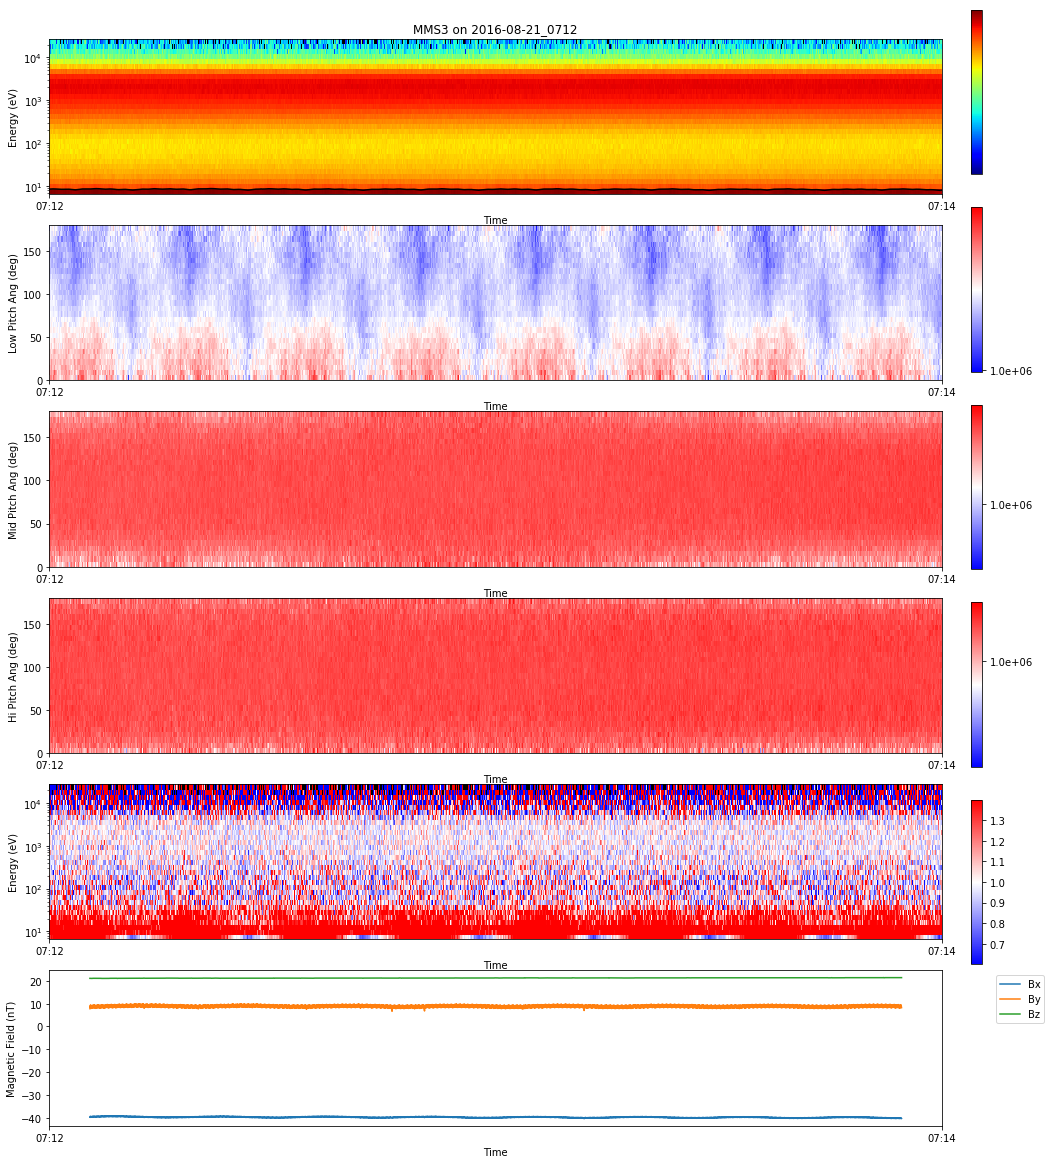

In [63]:
for li in m3_ebrst_debug_list:
    q = pycdf.CDF(li)
    Grapher.make_brst_summary_plot('mms3',q)

In [20]:
qq = pycdf.CDF(m3_ebrst_debug_list[0])

In [34]:
Grapher.make_brst_summary_plot('mms3',qq)

Grapher.py:481: RuntimeWarning: divide by zero encountered in log10
  omni            = np.ma.masked_invalid(np.log10(temp).T)
Grapher.py:483: RuntimeWarning: divide by zero encountered in log10
  low             = np.ma.masked_invalid(np.log10(temp).T)
Grapher.py:485: RuntimeWarning: divide by zero encountered in log10
  mid             = np.ma.masked_invalid(np.log10(temp).T)
Grapher.py:487: RuntimeWarning: divide by zero encountered in log10
  high            = np.ma.masked_invalid(np.log10(temp).T)
Grapher.py:491: RuntimeWarning: divide by zero encountered in divide
  ratio           = np.ma.masked_invalid(np.divide(par,anti))
Grapher.py:491: RuntimeWarning: invalid value encountered in divide
  ratio           = np.ma.masked_invalid(np.divide(par,anti))


In [35]:
obs = 'mms3'
times           = np.asarray(qq['Epoch'])
energies        = np.asarray(qq['%s_des_energy_brst' % obs])[0,:]
sc_pot          = np.asarray(qq['%s_des_scpot_mean_brst' % obs])
bx              = np.asarray(qq['%s_des_bentPipeB_X_DSC' % obs])
by              = np.asarray(qq['%s_des_bentPipeB_Y_DSC' % obs])
bz              = np.asarray(qq['%s_des_bentPipeB_Z_DSC' % obs])
bnorm           = np.asarray(qq['%s_des_bentPipeB_Norm' % obs])
par             = np.asarray(qq['%s_des_energyspectr_par_brst' % obs]).T
anti            = np.asarray(qq['%s_des_energyspectr_anti_brst' % obs]).T
temp            = np.asarray(qq['%s_des_energyspectr_omni_brst' % obs])
omni            = np.ma.masked_invalid(np.log10(temp).T)
temp            = np.asarray(qq['%s_des_pitchangdist_lowen_brst' % obs])
low             = np.ma.masked_invalid(np.log10(temp).T)
temp            = np.asarray(qq['%s_des_pitchangdist_miden_brst' % obs])
mid             = np.ma.masked_invalid(np.log10(temp).T)
temp            = np.asarray(qq['%s_des_pitchangdist_highen_brst' % obs])
high            = np.ma.masked_invalid(np.log10(temp).T)
angles          = np.linspace(0,180,30)
mean_par        = np.mean(par)
mean_anti       = np.mean(anti)
ratio           = np.ma.masked_invalid(np.divide(par,anti))
big_omni        = np.asarray(qq['%s_des_energyspectr_omni_brst' % obs])

C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log10
C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log10
C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in log10
C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in divide
C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in divide


In [30]:
BRST_time = dt.datetime.strftime(times[0],'%Y-%m-%d_%H%M')

In [31]:
fig = plt.figure(figsize=(16,20))

In [32]:
ax0 = fig.add_subplot(611)

In [34]:
cmap.jet.set_bad('k',alpha=1.0)
spec_data = ax0.pcolormesh(times,energies,omni,cmap=cmap.jet)

In [49]:
fig.show()

C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [36]:
x = np.arange(0,10)
y = x**x

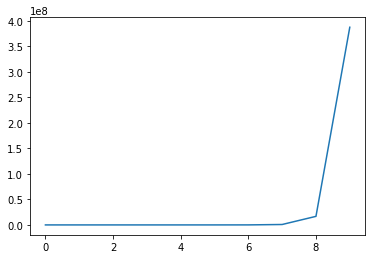

In [37]:
plt.plot(x,y)

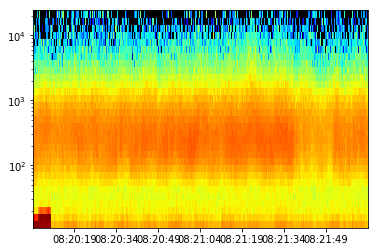

In [42]:
plt.pcolormesh(times,energies,omni,cmap=cmap.jet)
plt.yscale('log')

(25, 31)

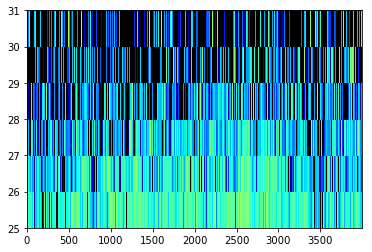

In [41]:
plt.pcolormesh(omni,cmap=cmap.jet)
plt.ylim([25,31])

In [47]:
energies[21]

2027.92

In [48]:
energies[27]

9012.5098

In [53]:
anti = np.asarray(qq['mms3_des_energyspectr_anti_brst']).T
par  = np.asarray(qq['mms3_des_energyspectr_par_brst']).T

In [55]:
ratio = np.ma.masked_invalid(np.divide(par,anti))

C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [56]:
np.min(ratio)

0.0

In [57]:
np.max(ratio)

149.19878

In [58]:
np.mean(ratio)

1.8228442711889774

In [59]:
ratio[ratio > 1.4] = 1.4
ratio[ratio < 0.6] = 0.6

C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


In [60]:
np.mean(ratio)

1.0691639527998646

In [12]:
min_exp = 4
max_exp = 8
log_cbar_span = np.array(range(min_exp,max_exp+1))

In [13]:
log_cbar_span

array([4, 5, 6, 7, 8])

In [18]:
cbar_span     = ['%1.0e' % val for val in 10.0**log_cbar_span]

In [19]:
cbar_span

['1e+04', '1e+05', '1e+06', '1e+07', '1e+08']

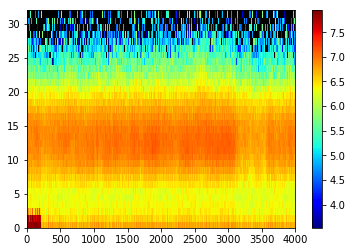

In [40]:
plt.pcolormesh(omni,cmap=cmap.jet)
plt.colorbar()

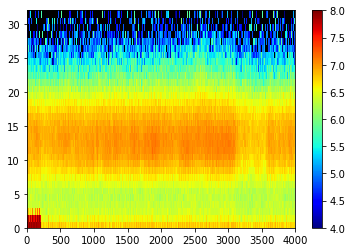

In [41]:
plt.pcolormesh(omni,cmap=cmap.jet,vmin=4,vmax=8)
plt.colorbar()

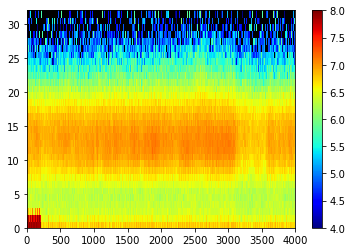

In [42]:
plt.pcolormesh(omni,cmap=cmap.jet,vmin=4,vmax=8)
spec_cbar = plt.colorbar()
log_cbar_span = np.array(range(min_exp,max_exp+1))

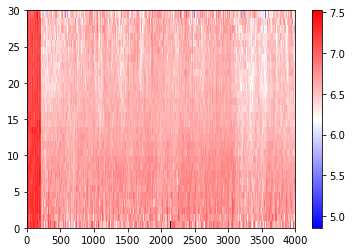

In [48]:
plt.pcolormesh(low,cmap=cmap.bwr)
low_cbar = plt.colorbar()

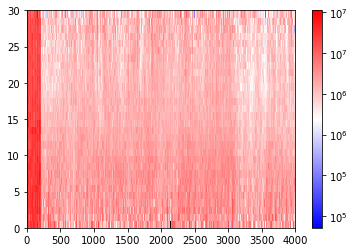

In [52]:
import matplotlib.ticker as ticker
plt.pcolormesh(low,cmap=cmap.bwr)
low_cbar = plt.colorbar(format=ticker.FormatStrFormatter('$10^{%d}$'))

In [82]:
min_exp = np.ceil(2*np.min(low))/2
max_exp = np.floor(2*np.max(low))/2

In [83]:
ticks   = np.arange(min_exp,max_exp+1)

In [84]:
ticks

array([ 5.,  6.,  7.,  8.])

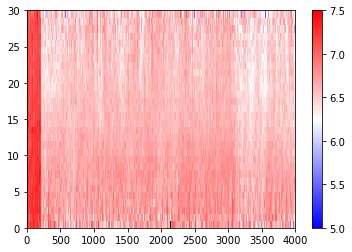

In [85]:
plt.pcolormesh(low,cmap=cmap.bwr,vmin=min_exp,vmax=max_exp)
plt.colorbar()

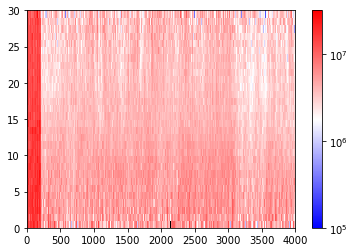

In [87]:
plt.pcolormesh(low,cmap=cmap.bwr,vmin=min_exp,vmax=max_exp)
plt.colorbar(ticks=ticks,format=ticker.FormatStrFormatter('$10^{%d}$'))